Welcome to this notebook. <br>
1) In this notebook your assignment is to predict the type of dog with a Neural Network.<br>
Written by Bart Bozon, please copy & use as you would like.

# Loading the data #

In [1]:
import pandas as pd
url = 'https://raw.githubusercontent.com/bbozon/DataScience/refs/heads/main/generated_dogs.csv'
'''
The dataset consists of 10000 dogs who died of old age. It is generated using meta data from dogs.

'''
df = pd.read_csv(url)
df.head()


,Breed,Gender,Age_time_of_death,Height,Weight,Likes,Skills
0,Border Collie,Male,13.3,20.70,40.50,likes_people_better_than_dogs,high_trainability
1,Basset Hound,Male,12.7,13.65,51.02,likes_dogs_better_than_people,no_special_skills
2,Dachshund,Female,14.0,8.59,24.58,likes_dogs_better_than_people,barks_like_hell
3,Boston Terrier,Male,12.3,16.27,20.13,likes_people_better_than_dogs,no_special_skills
4,Chihuahua,Male,15.3,7.14,5.92,likes_dogs_better_than_people,barks_like_hell


In [18]:
# split Breed as y and rest as X
y = df['Breed']
X = df.drop('Breed', axis=1)

# dummies of categorical variables in X
X = pd.get_dummies(X, drop_first=True)

from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(y)

import numpy as np
max_classes = np.max(y_encoded)+1

import tensorflow as tf
y_one_hot = tf.keras.utils.to_categorical(y_encoded, num_classes=max_classes)
print(y_one_hot)

# split the data into train, validation, and test sets
from sklearn.model_selection import train_test_split
X_temp, X_test, y_temp, y_test = train_test_split(X, y_one_hot, test_size=0.2, random_state=42)
X_train, X_val, y_train, y_val = train_test_split(X_temp, y_temp, test_size=0.25, random_state=42)

# # convert categorical variables to dummy variables
# X_train_convert = pd.get_dummies(pd.DataFrame(X_train, columns=X_train.columns))
# X_val_convert = pd.get_dummies(pd.DataFrame(X_val, columns=X_val.columns))
# X_test_convert = pd.get_dummies(pd.DataFrame(X_test, columns=X_test.columns))
#
# # scale the data
# from sklearn.preprocessing import StandardScaler
# scaler = StandardScaler()
# X_train_scaled = scaler.fit_transform(X_train_convert)
# X_val_scaled = scaler.transform(X_val_convert)
# X_test_scaled = scaler.transform(X_test_convert)

[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]


In [19]:
X_train

,Age_time_of_death,Height,Weight,Gender_Male,Likes_likes_everybody,Likes_likes_nobody,Likes_likes_people_better_than_dogs,Skills_high_trainability,Skills_no_special_skills
8588,10.7,26.45,92.61,False,False,False,False,False,True
3178,13.9,11.60,16.06,False,False,False,True,False,True
5200,13.2,22.06,55.98,True,False,True,False,False,True
8889,13.2,20.41,48.94,True,False,False,True,True,False
5789,13.2,25.90,71.63,True,False,False,False,True,False
...,...,...,...,...,...,...,...,...,...
8871,12.9,21.14,49.44,False,False,True,False,False,True
9826,11.1,25.79,83.88,True,False,False,False,False,True
5268,14.4,25.26,53.06,False,False,False,False,True,False
9666,8.7,30.62,133.49,False,False,False,False,False,True


In [20]:
# create the neural network
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

model = tf.keras.models.Sequential([
    tf.keras.layers.Input(shape=(X_train.shape[1],)),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(len(y.unique()), activation='softmax')
])

model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

model.summary()

Model: "sequential_4"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_12 (Dense)                │ (None, 64)             │           640 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_13 (Dense)                │ (None, 64)             │         4,160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_14 (Dense)                │ (None, 27)             │         1,755 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 6,555 (25.61 KB)

 Trainable params: 6,555 (25.61 KB)

 Non-trainable params: 0 (0.00 B)

In [21]:
history = model.fit(X_train, y_train, epochs=100, batch_size=32, validation_data=(X_val, y_val))

Epoch 1/100
188/188 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.2818 - loss: 3.1054 - val_accuracy: 0.4760 - val_loss: 1.8062
Epoch 2/100
188/188 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.5818 - loss: 1.4304 - val_accuracy: 0.6355 - val_loss: 1.1470
Epoch 3/100
188/188 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7513 - loss: 0.9012 - val_accuracy: 0.7980 - val_loss: 0.7089
Epoch 4/100
188/188 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8668 - loss: 0.5579 - val_accuracy: 0.9110 - val_loss: 0.4428
Epoch 5/100
188/188 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8960 - loss: 0.3859 - val_accuracy: 0.9060 - val_loss: 0.3167
Epoch 6/100
188/188 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9062 - loss: 0.2932 - val_accuracy: 0.9310 - val_loss: 0.2384
Epoch 7/100
188/188 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9173 - loss: 0.2449 - val_accuracy: 0.9240 - val_loss: 0.2075
Epoch 8/100
188/188 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9170 - loss: 0.2238 - val_accu

In [23]:
val_loss, val_accuracy = model.evaluate(X_val, y_val)
print(f"Validation Loss: {val_loss}")
print(f"Validation Accuracy: {val_accuracy}")

63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9650 - loss: 0.0761
Validation Loss: 0.07613731175661087
Validation Accuracy: 0.9649999737739563


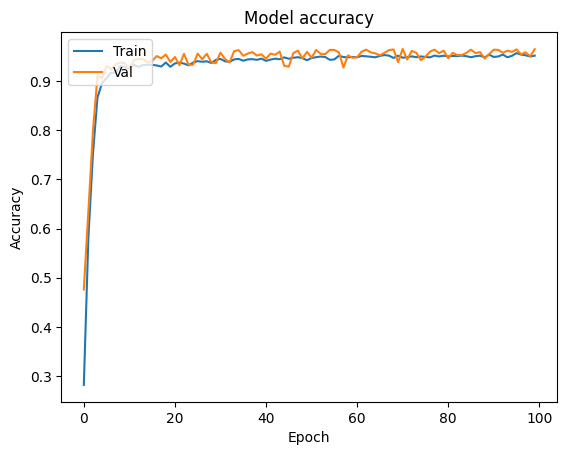

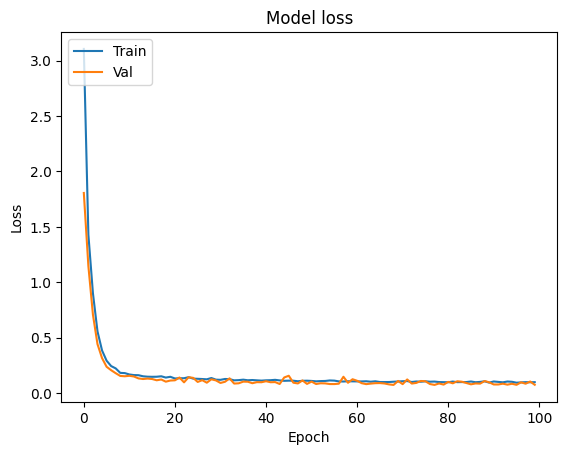

In [24]:
import matplotlib.pyplot as plt

# Plot training & validation accuracy values
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='upper left')
plt.show()

# Plot training & validation loss values
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='upper left')
plt.show()

63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
accuracy is : 0.947


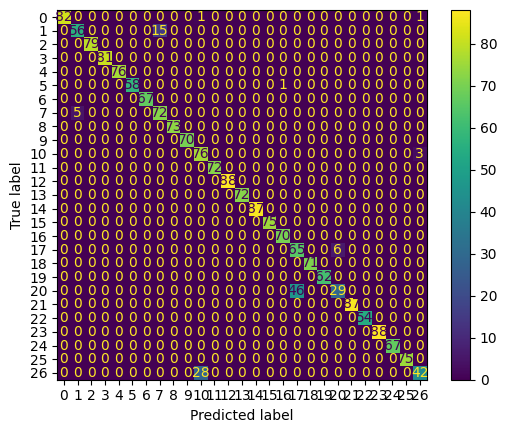

In [25]:
# Make predictions on the test set
predictions = model.predict(X_test)
pred = np.argmax(predictions, axis=1)
true_classes = np.argmax(y_test, axis=1)
from sklearn.metrics import ConfusionMatrixDisplay,accuracy_score
import matplotlib.pyplot as plt
ConfusionMatrixDisplay.from_predictions(true_classes, pred)
print ('accuracy is :',accuracy_score(true_classes, pred))